# **HR Analytics: Potential trainees to become Data Scientists**

International University, HCMC National University | School of Computer Science and Engineering

### **Course name: Data Analysis**
Professor: Assoc. Prof. Nguyen Thi Thuy Loan, PhD | December 02, 2022

### **Group Members**
- Ton Vo Thu Uyen - Student ID: ITDSIU20135
- Le Ngoc Uyen Phuong - Student ID: ITDSIU20079

# **Import libraries**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
os.chdir('/content/gdrive/My Drive/data/archive')

In [3]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 729 kB/s 


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import iqr
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
from sklearn.preprocessing import StandardScaler

In [5]:
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **A. Data Overview**


In [6]:
# Import data
hr_train = pd.read_csv('aug_train.csv')
hr_train.rename(columns = {'relevent_experience':'relevant_experience'}, inplace = True)
hr_train['relevant_experience'] = list(map(lambda x: x.replace('relevent', 'relevant'), hr_train['relevant_experience']))
hr_train

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevant experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevant experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
print("Dataset shape: ", hr_train.shape)
print("The dataset has", hr_train.shape[0], "rows and", hr_train.shape[1], "columns.\n")
print(hr_train.info())

Dataset shape:  (19158, 14)
The dataset has 19158 rows and 14 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target             

## **Atributes description**

There are **14 attributes** in the data set that records information about **19158 training candidates**. Different from the original information, the dataset should consist of 9 categorical and 5 numerical ones for efficiently used in the next steps. Besides, some attributes should be removed since they may not be utilized to answer the questions. Now let's explore the data!

Attribute | Description
--- | ---
enrollee_id | Unique ID for candidate
city | City code
city_ development _index | Developement index of the city (scaled)
gender | Gender of candidate
relevant_experience | Relevant experience of candidate
enrolled_university | Type of University course currently enrolled (if any)
education_level | Education level of candidate
major_discipline | Education major discipline of candidate
experience | Candidate total experience (in years)
company_size | Number of employees in current employer's company
company_type | Type of current employer
last_new_job | Difference in years between previous job and current job
training_hours | training hours completed
target| 0 – Not looking for job change, 1 – Looking for a job change


In [8]:
# Check for duplicate values
dup = hr_train.duplicated()
print(hr_train[dup])

Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevant_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours, target]
Index: []


In [9]:
d = pd.DataFrame(hr_train.dtypes)
d = d.rename(columns={0:'DataTypes'})
d['Count'] = hr_train.count()
d['MissingValues'] = hr_train.isnull().sum()
d['UniqueValues'] = hr_train.nunique()

def highlight_grtr(s,column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= 1
    return ['background-color: red' if is_max.any() else '' for v in is_max]

def highlight_grtr_1(s):
    if s.MissingValues > 1.0:
        return ['background-color: #F7D084']*4
    else:
        return ['background-color: white']*4

d.style.apply(highlight_grtr_1, axis=1)

,DataTypes,Count,MissingValues,UniqueValues
enrollee_id,int64,19158,0,19158
city,object,19158,0,123
city_development_index,float64,19158,0,93
gender,object,14650,4508,3
relevant_experience,object,19158,0,2
enrolled_university,object,18772,386,3
education_level,object,18698,460,5
major_discipline,object,16345,2813,6
experience,object,19093,65,22
company_size,object,13220,5938,8


# **B. Exploratory Data Analysis (EDA)**


## **B.1. Numerical attributes**

In [10]:
num = [c for c in hr_train.columns if hr_train[c].dtypes!='object']
num

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [11]:
round(hr_train.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.36,9616.29,1.00,8554.25,16982.5,25169.75,33380.00
city_development_index,19158.0,0.83,0.12,0.45,0.74,0.9,0.92,0.95
training_hours,19158.0,65.37,60.06,1.00,23.00,47.0,88.00,336.00
target,19158.0,0.25,0.43,0.00,0.00,0.0,0.00,1.00


In [12]:
hr_train.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [13]:
# Color palettes
palette = ['#06436c', '#4895c7', '#81c7c7', '#b1d8d8', '#fae6ba', '#ffcf60', '#ff7884', '#ffb5bd', '#a8bfce', '#595959']
palette1 = ['#4895c7', '#81c7c7', '#b1d8d8', '#fae6ba', '#ffcf60', '#ff7884', '#ffb5bd', '#a8bfce', '#595959']
palette2 = ['#81c7c7', '#b1d8d8', '#fae6ba', '#ffcf60', '#ff7884', '#ffb5bd', '#a8bfce', '#595959']
blyl = ['#003d6a', '#06436c', '#4895c7', '#81c7c7', '#b1d8d8', '#fae6ba', '#f7d084', '#ffcf60']
blpk = ['#003d6a', '#06436c', '#4895c7', '#d8e3ea', '#ffeff1', '#fed7d8', '#ffb5bd', '#f798a2', '#ff7884']

In [ ]:
fig = px.imshow(round(hr_train.corr(), 3), text_auto=True, color_continuous_scale='bluyl')
fig.show()

In [14]:
corr1 = pd.DataFrame(hr_train.corr()['target'])
fig = px.line(corr1, x=corr1.index, y='target', markers=True, width=680, height=400, title="Correlation with target", color_discrete_sequence=palette)
fig.update_xaxes(title=None)
fig.update_yaxes(title=None)
fig.add_hline(y=0, line_color="#ff7884", line_dash="dash",
              annotation_text="No correlation", 
              annotation_position="bottom right", annotation_font_color="red")
fig.add_trace(go.Scatter(x=["city_development_index"], y=[corr1.iloc[1, 0]], mode = 'markers',
                         marker_symbol = 'circle',
                         marker_size = 12, name="negative corr", marker_color="red"))
fig.show()

In [15]:
round(hr_train.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.36,9616.29,1.00,8554.25,16982.5,25169.75,33380.00
city_development_index,19158.0,0.83,0.12,0.45,0.74,0.9,0.92,0.95
training_hours,19158.0,65.37,60.06,1.00,23.00,47.0,88.00,336.00
target,19158.0,0.25,0.43,0.00,0.00,0.0,0.00,1.00


In [ ]:
for i in ['city_development_index', 'training_hours']:
  fig = px.histogram(hr_train, x=i, marginal="box",
                   hover_data=hr_train.columns, width=1000, height=400,
                   color_discrete_sequence=palette)
  fig.add_vline(x=hr_train[i].mean(), line_color="#ff7884", line_dash="dash",
              annotation_text="", line_width=5, annotation_font_color="red")
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **B.2. Categorical attributes**

In [16]:
cat = [c for c in hr_train.columns if hr_train[c].dtypes=='object']
cat

['city',
 'gender',
 'relevant_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [17]:
des = {'Description': ['Unique ID for candidate', 'City code', 'Developement index of the city (scaled)', 
                       'Gender of candidate', 'Relevant experience of candidate', 'Type of University course enrolled (if any)', 
                       'Education level of candidate', 'Education major discipline of candidate', 
                       'Candidate total experience (in years)', "Number of employees in current employer's company", 
                       'Type of current employer', 'Difference in years between previous and current job', 
                       'Training hours completed', '0 – Not looking for job change 1 – Looking for a job change']}
dsc = pd.DataFrame(des, index=hr_train.columns)
c_dsc = dsc.loc[cat]
c = pd.DataFrame(hr_train.describe(include=['object']).T)
j=[]
for col in cat:
  j.append(", ".join([str(item) for item in hr_train[col].unique()]))
c['Unique values'] = j
pd.concat([c_dsc, c], axis=1)

,Description,count,unique,top,freq,Unique values
city,City code,19158,123,city_103,4355,"city_103, city_40, city_21, city_115, city_162..."
gender,Gender of candidate,14650,3,Male,13221,"Male, nan, Female, Other"
relevant_experience,Relevant experience of candidate,19158,2,Has relevant experience,13792,"Has relevant experience, No relevant experience"
enrolled_university,Type of University course enrolled (if any),18772,3,no_enrollment,13817,"no_enrollment, Full time course, nan, Part tim..."
education_level,Education level of candidate,18698,5,Graduate,11598,"Graduate, Masters, High School, nan, Phd, Prim..."
major_discipline,Education major discipline of candidate,16345,6,STEM,14492,"STEM, Business Degree, nan, Arts, Humanities, ..."
experience,Candidate total experience (in years),19093,22,>20,3286,">20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 10..."
company_size,Number of employees in current employer's company,13220,8,50-99,3083,"nan, 50-99, <10, 10000+, 5000-9999, 1000-4999,..."
company_type,Type of current employer,13018,6,Pvt Ltd,9817,"nan, Pvt Ltd, Funded Startup, Early Stage Star..."
last_new_job,Difference in years between previous and curre...,18735,6,1,8040,"1, >4, never, 4, 3, 2, nan"


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

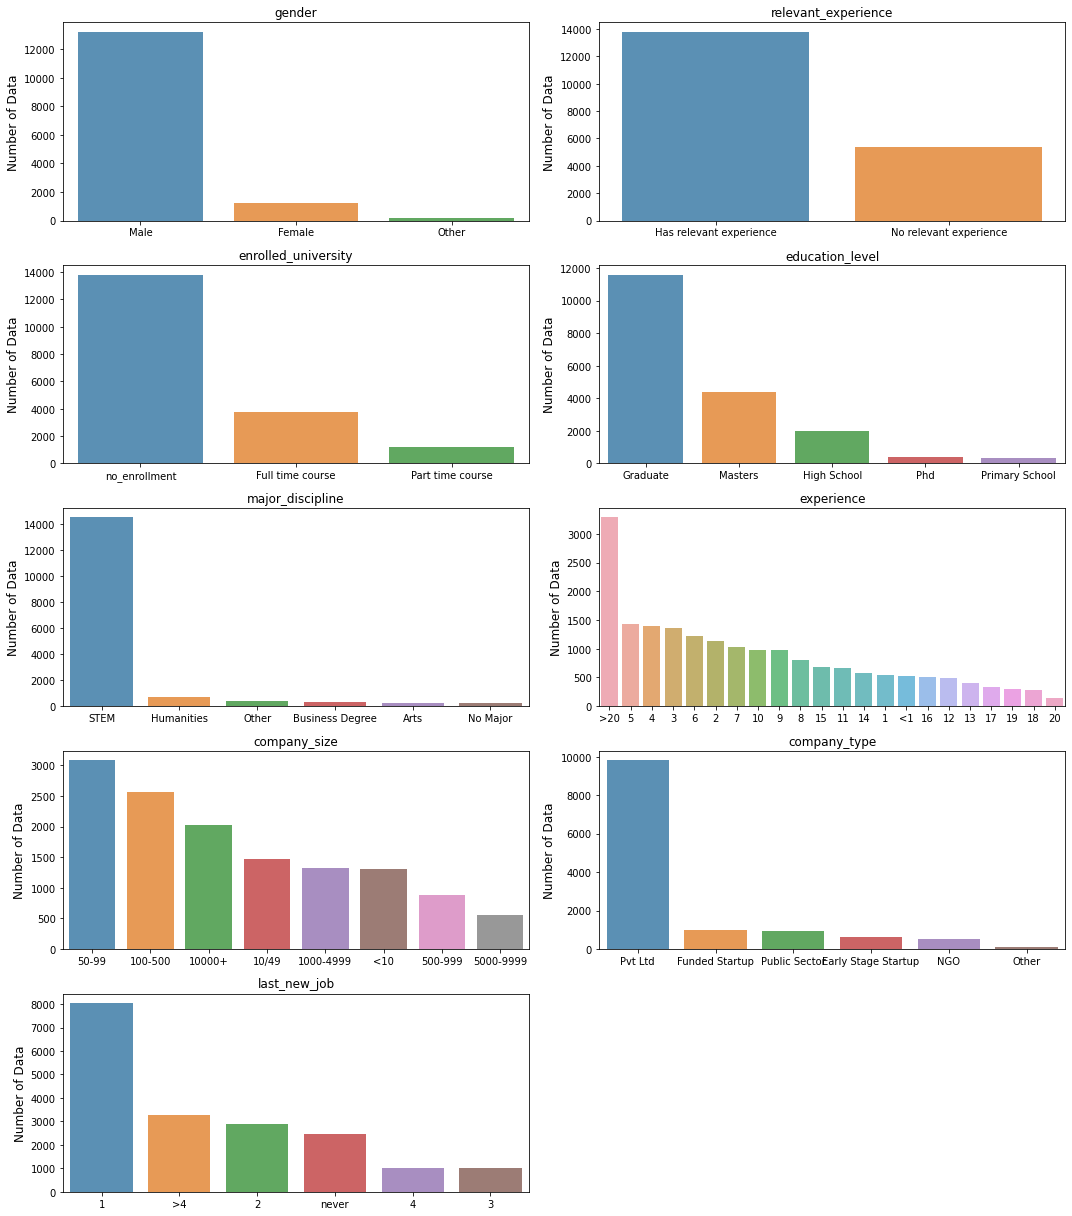

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



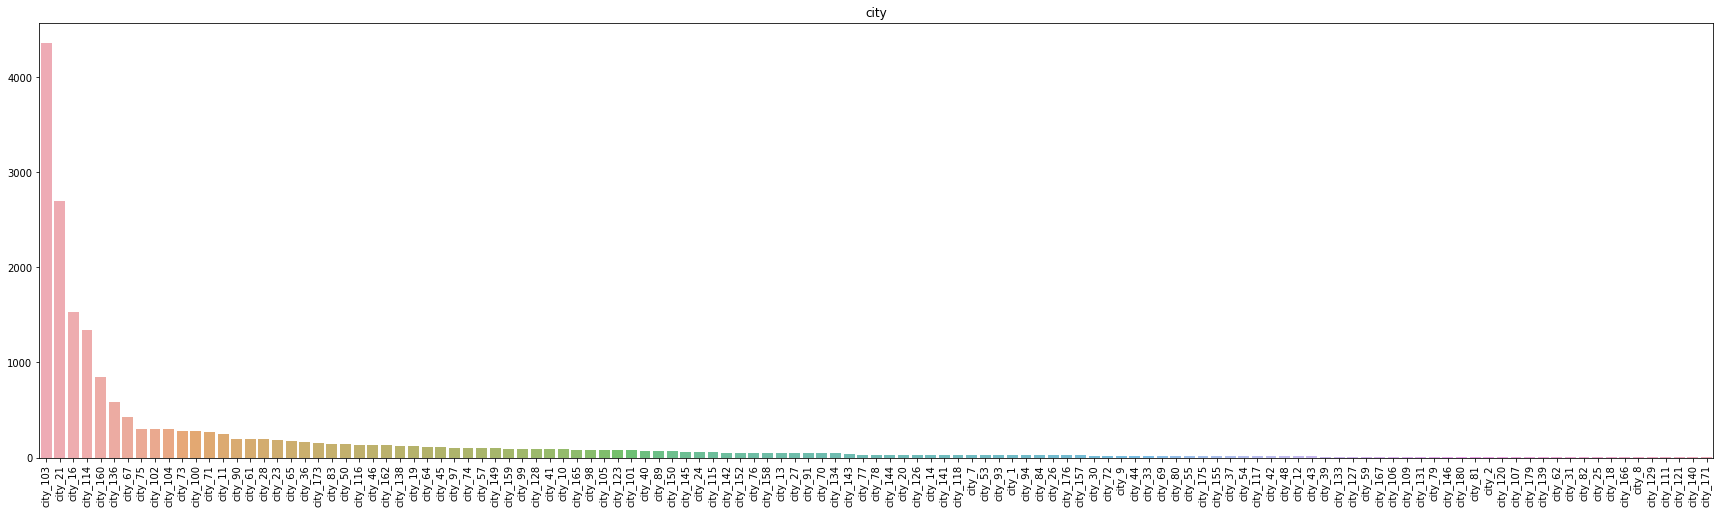

In [ ]:
# Bar plots showing the frequency of each categorical attributes
plt.figure(figsize=[15,17])
n=1
for i in cat:
    if i not in ['enrollee_id', 'city']:
      plt.subplot(5,2,n)
      x = hr_train[i].value_counts()
      sns.barplot(x.index, x.values, alpha=0.8)
      plt.ylabel('Number of Data', fontsize=12)
      plt.title(i)
      n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[30,8])
x = hr_train['city'].value_counts()
sns.barplot(x.index, x.values, alpha=0.8)
plt.xticks(rotation=90)
plt.title('city', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
px.histogram(hr_train, x="company_size",color="target", barmode="group", width=800, height=400, 
             color_discrete_map = {0.0: '#4895c7',
                                   1.0: '#ff7884'})
# --> The impact of the company_size on the outcomes are not very significant --> We're not gonna use this variable

<Figure size 720x288 with 0 Axes>

# **C. Preprocessing - Data Cleaning**

## **C.1. Dealing with unnecessary columns & incorrect data types**
Among the 14 columns, the address of the trainee (**city**) are not really used, so it will be ignored and taken out of the dataset.

Moreover, since we're not gonna do any calculation with the **enrollee_id**, it's better to convert it to string object so that it won't pop up at anytime we handle the numeric values.

In [18]:
# Create a copy of hr_train for further processing
# Drop irrelevant columns & deal with incorrect data types
HR_train = hr_train.copy()
HR_train['enrollee_id'] = HR_train['enrollee_id'].astype(str)
HR_train.drop(['city', 'company_size'], axis=1, inplace=True)

## **C.2. Removing special characters**

In [19]:
HR_train['experience'] = HR_train['experience'].replace({'>20':'21', '<1':'0.5'})
HR_train['last_new_job'] = HR_train['last_new_job'].replace({'>4':'5', 'never':'0'})
change = ['experience', 'last_new_job']
HR_train[change] = HR_train[change].apply(pd.to_numeric, axis=1)
print(HR_train['experience'].dtype, HR_train['last_new_job'].dtype)
HR_train.info()

float64 float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevant_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  float64
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  float64
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


## **C.3. Handling Missing Value**

### **C.3.1. Detect Missing Value**

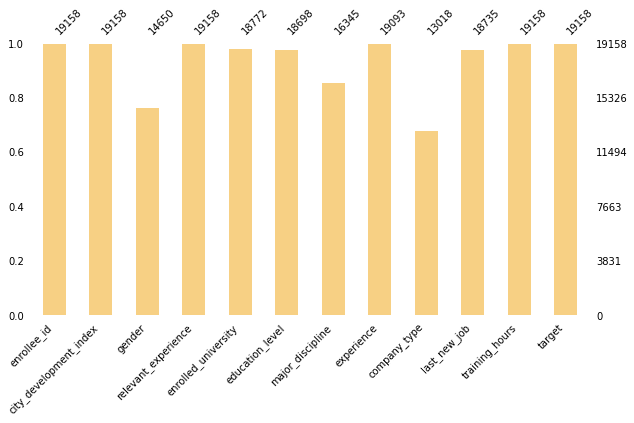

In [20]:
msno.bar(HR_train, figsize = (10,5), color="#F7D084", fontsize=10)

### **C.3.2. Drop Missing Value**

In [21]:
#Drop missing value in the Experience column
HR_train.dropna(subset = ['experience'], inplace = True)

### **C.3.3. Fill Missing Value**

In [22]:
HR_train.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                    4459
relevant_experience          0
enrolled_university        381
education_level            450
major_discipline          2796
experience                   0
company_type              6104
last_new_job               399
training_hours               0
target                       0
dtype: int64

In [23]:
# Fill missing value with new class "Unknown" (categorical) and mean values (numerical)
col_with_null = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']

for col in col_with_null:
    HR_train[col].fillna(value = 'Unknown', inplace = True)
HR_train['last_new_job'] = HR_train['last_new_job'].fillna(HR_train['last_new_job'].mean().round(2))

In [24]:
HR_train.isnull().sum()

enrollee_id               0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## **C.4. Handling Outliers**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60d4c26a30>,
      dtype=object)

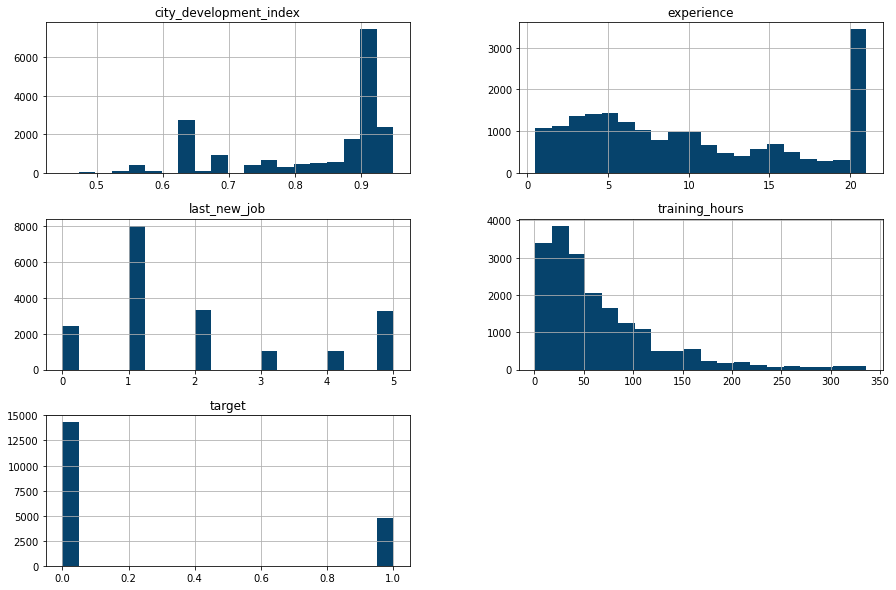

In [25]:
HR_train.hist(bins = 20, figsize = (15,10), color = '#06436C')

In [26]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Box(y=HR_train['training_hours'], name='training_hours', marker_color='#4895c7'),
    row=1, col=1)
fig.add_trace(
    go.Box(y=HR_train['city_development_index'], name='city_development_index', marker_color='#06436c'),
    row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Outliers in numerical attributes")
fig.show()

In [27]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

1 2
z-score of 2 corresponds to a prob of 0.27%
Rejection 978 points
2 3
z-score of 3 corresponds to a prob of 0.27%
Rejection 449 points
3 4
z-score of 4 corresponds to a prob of 0.27%
Rejection 176 points
4 5
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


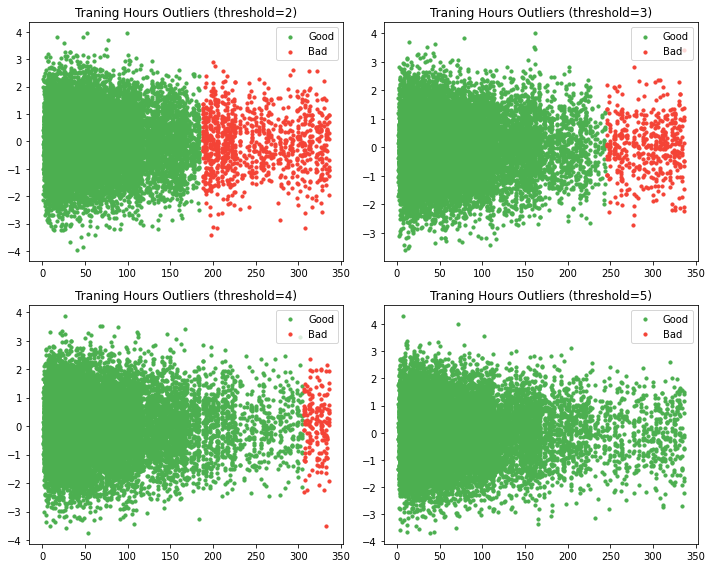

In [28]:
plt.figure(figsize=(10, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    print(i, threshold)
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=HR_train.shape[0])
    good = z_score(HR_train['training_hours'], threshold=threshold)
    plt.scatter(HR_train['training_hours'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(HR_train['training_hours'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Traning Hours Outliers (threshold={threshold})")

plt.tight_layout()

In [29]:
good = z_score(HR_train['training_hours'], 3)
good_hours = HR_train[good]
print(max(good_hours['training_hours']))

z-score of 3 corresponds to a prob of 0.27%
Rejection 449 points
244


In [30]:
condition = HR_train['training_hours'] <= 244
HR_train = HR_train[condition]
HR_train.describe().T   #Outliers in training_hours have been removed
                        #Maximum value for this column now is 244 hours.

,count,mean,std,min,25%,50%,75%,max
city_development_index,18644.0,0.829130,0.123215,0.448,0.74,0.903,0.92,0.949
experience,18644.0,10.116955,6.761307,0.500,4.00,9.000,16.00,21.000
last_new_job,18644.0,2.003915,1.659969,0.000,1.00,1.000,3.00,5.000
training_hours,18644.0,59.875724,49.015650,1.000,23.00,46.000,84.00,244.000
target,18644.0,0.249946,0.432993,0.000,0.00,0.000,0.00,1.000


In [31]:
# Copy the cleaned dataset
h = HR_train.copy()
h.head()

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,21.0,Unknown,1.0,36,1.0
1,29725,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15.0,Pvt Ltd,5.0,47,0.0
2,11561,0.624,Unknown,No relevant experience,Full time course,Graduate,STEM,5.0,Unknown,0.0,83,0.0
3,33241,0.789,Unknown,No relevant experience,Unknown,Graduate,Business Degree,0.5,Pvt Ltd,0.0,52,1.0
4,666,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,21.0,Funded Startup,4.0,8,0.0


# **D. Descriptive Analysis**

## **D.1. Univariate analysis**

### **D.1.1. Numerical attributes**
1. Measures of Central Tendency
- Mean
- Mode
- Median
2. Measures of Dispersion
- Min, Max, Range
- Quartiles and Inter Quartiles
- Variance and Standard Deviation

In [32]:
num = [c for c in h.columns if h[c].dtypes!='object']
num

['city_development_index',
 'experience',
 'last_new_job',
 'training_hours',
 'target']

In [35]:
r = []
for i in num:
  r.append(iqr(h[i]))

k = pd.DataFrame(h.describe().T)
k['range'] = k['max'] - k['min']
k['IQR'] = r
k.insert(2, 'mode', h[num].mode().T, True)
k.insert(4, 'var', h[num].var(), True)
k

,count,mean,mode,std,var,min,25%,50%,75%,max,range,IQR
city_development_index,18644.0,0.829130,0.92,0.123215,0.015182,0.448,0.74,0.903,0.92,0.949,0.501,0.18
experience,18644.0,10.116955,21.00,6.761307,45.715267,0.500,4.00,9.000,16.00,21.000,20.500,12.00
last_new_job,18644.0,2.003915,1.00,1.659969,2.755496,0.000,1.00,1.000,3.00,5.000,5.000,2.00
training_hours,18644.0,59.875724,28.00,49.015650,2402.533983,1.000,23.00,46.000,84.00,244.000,243.000,61.00
target,18644.0,0.249946,0.00,0.432993,0.187483,0.000,0.00,0.000,0.00,1.000,1.000,0.00


In [36]:
rp.summary_cont(h[num])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,city_development_index,18644.0,0.8291,0.1232,0.0009,0.8274,0.8309
1,experience,18644.0,10.1170,6.7613,0.0495,10.0199,10.2140
2,last_new_job,18644.0,2.0039,1.6600,0.0122,1.9801,2.0277
3,training_hours,18644.0,59.8757,49.0157,0.3590,59.1721,60.5793
4,target,18644.0,0.2499,0.4330,0.0032,0.2437,0.2562


In [37]:
h.skew()

<ipython-input-37-e306cb8f34b2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



enrollee_id              -0.020875
city_development_index   -1.000382
experience                0.419028
last_new_job              0.802813
training_hours            1.263607
target                    1.155124
dtype: float64

In [ ]:
fig = make_subplots(rows=1, cols=5)
l = 1
for i in num:
  fig.add_trace(
    go.Box(y=h[i], name=i, marker_color='#4895c7'),
    row=1, col=l)
  l=l+1
fig.update_traces(showlegend=False)
fig.update_layout(height=600, width=1000, title_text="Boxplots of numerical attributes")
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

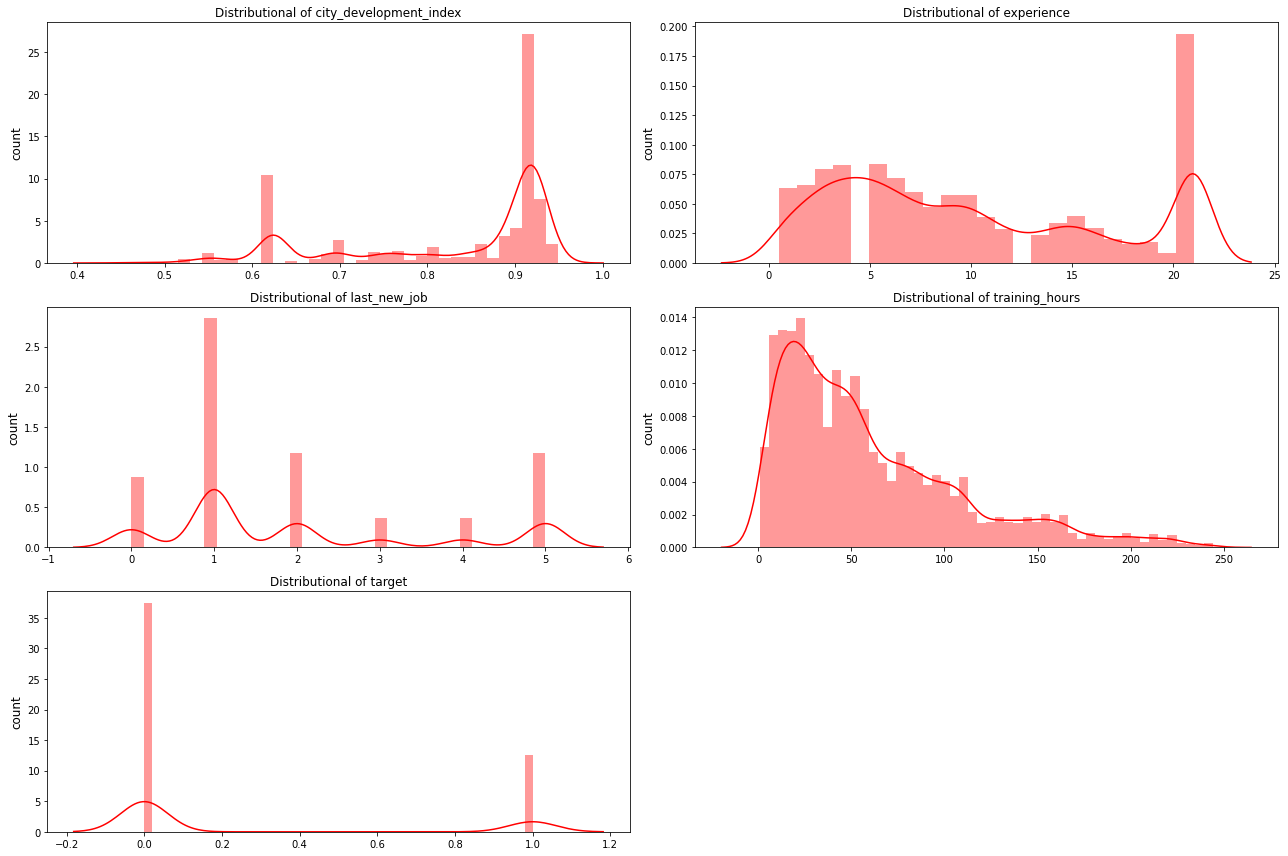

In [ ]:
plt.figure(figsize=[18,12])
n=1
for i in num:
    plt.subplot(3,2,n)
    ax = sns.distplot(h[i],color='red')
    plt.ylabel('count', fontsize=12)
    plt.xlabel('')
    plt.title("Distributional of " + i)
    n=n+1
plt.tight_layout()
plt.show()

### **D.1.2. Categorical attributes**

In [38]:
cat = [c for c in h.columns if h[c].dtypes=='object']
cat

['enrollee_id',
 'gender',
 'relevant_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type']

In [39]:
# Description after handling missing values
h.describe(include=['object'])

,enrollee_id,gender,relevant_experience,enrolled_university,education_level,major_discipline,company_type
count,18644,18644,18644,18644,18644,18644,18644
unique,18644,4,2,4,6,7,7
top,8949,Male,Has relevant experience,no_enrollment,Graduate,STEM,Pvt Ltd
freq,1,12900,13422,13458,11292,14105,9553


## **D.2. Bivariate analysis**

### **Q1: Does city development statistics affect the job decision of data scientist trainees?**


In [40]:
c1 = pd.DataFrame(h.groupby(pd.cut(h.city_development_index, np.arange(0.4,1.1,0.05)))['target'].apply(lambda x: x.sum()/len(x)))
c2 = pd.DataFrame(h.groupby(pd.cut(h.city_development_index, np.arange(0.4,1.1,0.05)))['target'].apply(lambda x: 1-(x.sum()/len(x))))
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Tendency to change job (target=1)", "Tendency to remain at the company (target=0)"))

fig.add_trace(
    go.Scatter(x=c1[c1.target.notnull()].index.astype(str),
                y=c1[c1.target.notnull()]['target'],
                mode='lines+markers',
                line = dict(color='tomato', width=2, dash='dash')),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=c2[c2.target.notnull()].index.astype(str),
                y=c2[c2.target.notnull()]['target'],
                mode='lines+markers',
                line = dict(color='#06436c', width=2, dash='dash')),
    row=1, col=2)
fig.update_traces(showlegend=False)
fig.update_traces(marker=dict(size=8))
fig.update_layout(height=500, width=1100, title_text="City development index vs Target")
fig.show()

<ipython-input-40-10cc001dcff5>:1: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-40-10cc001dcff5>:2: RuntimeWarning:

invalid value encountered in double_scalars



### **Q2: Which gender is likely to stay with the company after training courses?**

In [217]:
fig = px.histogram(h, x="gender", color="target", barmode="group", width=800, height=400, text_auto=True,
             color_discrete_map = {0.0: '#06436c',
                                   1.0: '#ff7884'}, title="Number of Gender vs. Target")
fig.update_layout(template="plotly_white")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [149]:
df0 = pd.DataFrame(h.groupby(['gender', 'target'])['target'].count().groupby(level = 0).transform(lambda x: x*100/x.sum()))
df0.rename(columns = {'target':'percentage'}, inplace = True)
df0.reset_index(inplace=True)
df0['target'] = df0['target'].astype(str)
df0['target'] = list(map(lambda x: x.replace('0.0', 'stay').replace('1.0', 'leave'), df0['target']))

piep = ['#37c4c0', 'tomato']
fig = go.Figure()
l = 1
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])
for i in df0['gender'].unique():
  if i != 'Unknown':
    dff = df0[df0['gender'] == i]
    print(dff)
    fig.add_trace(go.Pie(labels=dff['target'], values=dff['percentage'], name=i, marker_colors=piep), 1, l)
    fig.update_traces(hole=.5, hoverinfo="label+percent+name")
    fig.update_layout(
        annotations=[dict(text=df0['gender'].unique()[0], x=0.105, y=0.505, font_size=20, showarrow=False), 
                     dict(text=df0['gender'].unique()[1], x=0.5, y=0.505, font_size=20, showarrow=False),
                     dict(text=df0['gender'].unique()[2], x=0.89, y=0.505, font_size=20, showarrow=False)])
    l = l + 1
fig.update_layout(title='Turnover rate between Genders')
fig.update_traces(textposition='inside', textfont=dict(size=16, color="White"))
fig.show()

   gender target  percentage
0  Female   stay   73.349835
1  Female  leave   26.650165
  gender target  percentage
2   Male   stay   77.139535
3   Male  leave   22.860465
  gender target  percentage
4  Other   stay   73.913043
5  Other  leave   26.086957


It is obvious that the number of "Male" is way larger than "Female" and other genders. However, there is a relatively large number of trainees who refused to give their gender information, which is shown as "Unknown".

### **Q3: Is relevant experience in the data science field necessary to join in the program?**


In [154]:
df01 = pd.DataFrame(h.groupby(['relevant_experience', 'target'])['target'].count().groupby(level = 0).transform(lambda x: x*100/x.sum()))
df01.rename(columns = {'target':'percentage'}, inplace = True)
df01.reset_index(inplace=True)
df01['target'] = df01['target'].astype(str)
df01['target'] = list(map(lambda x: x.replace('0.0', 'stay').replace('1.0', 'leave'), df01['target']))

piep = ['#37c4c0', 'tomato']
fig = go.Figure()
l = 1
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
for i in df01['relevant_experience'].unique():
  if i != 'Unknown':
    dff = df01[df01['relevant_experience'] == i]
    print(dff)
    fig.add_trace(go.Pie(labels=dff['target'], values=dff['percentage'], name=i, marker_colors=piep), 1, l)
    fig.update_traces(hole=.7, hoverinfo="label+percent+name")
    fig.update_layout(
        annotations=[dict(text=df01['relevant_experience'].unique()[0], x=0.11, y=0.5, font_size=17, showarrow=False), 
                     dict(text=df01['relevant_experience'].unique()[1], x=0.885, y=0.5, font_size=17, showarrow=False)])
    l = l + 1
fig.update_layout(title='Turnover rate vs. Relevant experience')
fig.update_traces(textposition='inside', textfont=dict(size=20, color="White"))
fig.show()

       relevant_experience target  percentage
0  Has relevant experience   stay   78.497988
1  Has relevant experience  leave   21.502012
      relevant_experience target  percentage
2  No relevant experience   stay   66.028342
3  No relevant experience  leave   33.971658


### **Q4: ?**


In [153]:
df02 = pd.DataFrame(h.groupby(['enrolled_university', 'target'])['target'].count().groupby(level = 0).transform(lambda x: x*100/x.sum()))
df02.rename(columns = {'target':'percentage'}, inplace = True)
df02.reset_index(inplace=True)
df02['target'] = df02['target'].astype(str)
df02['target'] = list(map(lambda x: x.replace('0.0', 'stay').replace('1.0', 'leave'), df02['target']))

fig = go.Figure()
l = 1
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])
for i in df02['enrolled_university'].unique():
  if i != 'Unknown':
    dff = df02[df02['enrolled_university'] == i]
    print(dff)
    fig.add_trace(go.Pie(labels=dff['target'], values=dff['percentage'], name=i, marker_colors=piep), 1, l)
    fig.update_traces(hole=.6, hoverinfo="label+percent+name")
    fig.update_layout(
        annotations=[dict(text=df02['enrolled_university'].unique()[0], x=0.068, y=0.505, font_size=17, showarrow=False), 
                     dict(text=df02['enrolled_university'].unique()[1], x=0.5, y=0.505, font_size=17, showarrow=False),
                     dict(text=df02['enrolled_university'].unique()[3], x=0.925, y=0.505, font_size=17, showarrow=False)])
    l = l + 1
fig.update_layout(title='Turnover rate vs. Enrolled university courses')
fig.update_traces(textposition='inside', textfont=dict(size=18, color="White"))
fig.show()

  enrolled_university target  percentage
0    Full time course   stay    61.77437
1    Full time course  leave    38.22563
  enrolled_university target  percentage
2    Part time course   stay   74.827586
3    Part time course  leave   25.172414
  enrolled_university target  percentage
6       no_enrollment   stay   78.808144
7       no_enrollment  leave   21.191856


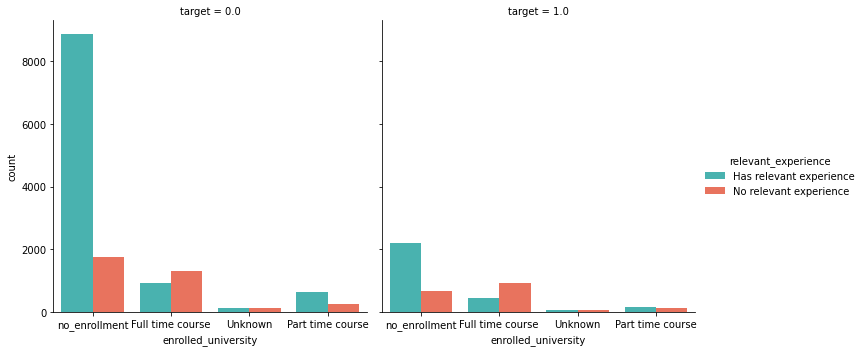

In [213]:
sns.catplot(data=h, x='enrolled_university', hue='relevant_experience', col='target', kind='count', height=5, palette=piep)

### **Q5: Which educational level wants to look for a new job the most?**

In [157]:
df03 = pd.DataFrame(h.groupby(['education_level', 'target'])['target'].count().groupby(level = 0).transform(lambda x: x*100/x.sum()))
df03.rename(columns = {'target':'percentage'}, inplace = True)
df03.reset_index(inplace=True)
df03['target'] = df03['target'].astype(str)
df03['%'] = round(df03['percentage'], 2)
df03['target'] = list(map(lambda x: x.replace('0.0', 'stay').replace('1.0', 'leave'), df03['target']))

fig = px.bar(df03[df03['education_level'] != 'Unknown'], x="education_level", y="percentage", color="target", barmode="stack", 
      text='%', color_discrete_map = {'stay': '#37c4c0', 'leave': 'tomato'})
fig.update_layout(template="simple_white", width=800, height=400, title='Turnover rate vs. Education level (%)')
fig.update_traces(textposition='inside', textfont=dict(size=14, color="White"))
fig.show()

In [158]:
fig = go.Figure()
l = 1
fig = make_subplots(rows=1, cols=5, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])
for i in df03['education_level'].unique():
  if i not in ['Unknown']:
    dff = df03[df03['education_level'] == i]
    print(dff)
    fig.add_trace(go.Pie(labels=dff['target'], values=dff['percentage'], name=i, marker_colors=piep), 1, l)
    fig.update_traces(hole=.7, hoverinfo="label+percent+name")
    fig.update_layout(
        annotations=[dict(text=df03['education_level'].unique()[0], x=0.038, y=0.505, font_size=18, showarrow=False), 
                     dict(text=df03['education_level'].unique()[1], x=0.24, y=0.505, font_size=16, showarrow=False),
                     dict(text=df03['education_level'].unique()[2], x=0.5, y=0.505, font_size=18, showarrow=False),
                     dict(text=df03['education_level'].unique()[3], x=0.73, y=0.505, font_size=18, showarrow=False),
                     dict(text=df03['education_level'].unique()[4], x=0.975, y=0.505, font_size=14, showarrow=False)])
    l = l + 1
fig.update_layout(title='Turnover rate vs. Education level (%)')
fig.update_traces(textposition='inside', textfont=dict(size=18, color="White"))
fig.show()

  education_level target  percentage      %
0        Graduate   stay   71.971307  71.97
1        Graduate  leave   28.028693  28.03
  education_level target  percentage      %
2     High School   stay   80.407125  80.41
3     High School  leave   19.592875  19.59
  education_level target  percentage      %
4         Masters   stay   78.475653  78.48
5         Masters  leave   21.524347  21.52
  education_level target  percentage      %
6             Phd   stay   85.894207  85.89
7             Phd  leave   14.105793  14.11
  education_level target  percentage      %
8  Primary School   stay   86.666667  86.67
9  Primary School  leave   13.333333  13.33


### **Q6: Which company type offers the trainees the best environment to progress their job?**

In [162]:
df04 = pd.DataFrame(h.groupby(['company_type', 'target'])['target'].count().groupby(level = 0).transform(lambda x: x*100/x.sum()))
df04.rename(columns = {'target':'percentage'}, inplace = True)
df04.reset_index(inplace=True)
df04['target'] = df04['target'].astype(str)
df04['%'] = round(df04['percentage'], 2)
df04['target'] = list(map(lambda x: x.replace('0.0', 'stay').replace('1.0', 'leave'), df04['target']))

fig = px.bar(df04[df04['company_type'] != 'Unknown'], x="company_type", y="percentage", color="target", barmode="stack", 
      text='%', color_discrete_map = {'stay': '#37c4c0', 'leave': 'tomato'})
fig.update_traces(textposition='inside', textfont=dict(size=14, color="White"))
fig.update_layout(template="simple_white", width=900, height=400, title='Turnover rate vs. Company type (%)')
fig.show()

### **Q7: Which random variables in the dataset are the key factors that determine whether a trainee will stay with the company?**

City_development_index and Experience are the 2 variables that have the impact on the decision of trainees. 

Since they have a negative correlation with the Target attribute, with its "0" value meaning "Not looking for a new job" or "Not leaving the company", the trainees are more likely to stay with the company when the values of City_development_index and Experience attributes increase.

In [ ]:
fig = px.imshow(round(h.corr(), 3), text_auto=True, color_continuous_scale='bluyl')
fig.show()

In [218]:
fig = px.box(h, y="experience", x="last_new_job", color="target", color_discrete_map = {0.0: '#06436c', 1.0: '#ff7884'})
fig.update_layout(template="simple_white", width=900, height=500, title='Experience vs. Time between previous & current job (year)')
fig.show()

In [216]:
f = ['#06436c', 'tomato']
fig = px.scatter(h, y="experience", x="city_development_index", color_continuous_scale=f, color="target")
fig.update_layout(template="simple_white", width=1000, height=500, title='Experience vs. City development index')
fig.show()

# **E. Preprocessing - Data Transformation**

## **E.1. Encoding categorical data**

In [ ]:
# Nominal attributes -> Dummies Encoder / OneHot Encoder --> kaggle notebook ex
nom = ['gender', 'major_discipline', 'company_type']
# Ordinal attributes -> Label Encoder
ord = ['education_level', 'enrolled_university', 'relevant_experience']

### **E.1.1. Label Encoder / Ordinal Mapping (Ordinal)**

In [ ]:
def Ordinal_Encode(df):
  data = df.copy()
  education_level_map = {'Unknown': 0, 'Primary School': 1,'High School': 2,'Graduate': 3, 'Masters': 4,'Phd': 5}
  enrolled_uni_map = {'Unknown': 0,'no_enrollment': 1, 'Part time course': 2, 'Full time course': 3}
  relevant_exp_map = {'No relevant experience': 0, 'Has relevant experience': 1}
  
  data.loc[:,'education_level'] = data['education_level'].map(education_level_map)
  data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_uni_map)
  data.loc[:,'relevant_experience'] = data['relevant_experience'].map(relevant_exp_map)
  return data

h_ord = Ordinal_Encode(h)

In [ ]:
h_ord.head()

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,1,1,3,STEM,21.0,Unknown,1.0,36,1.0
1,29725,0.776,Male,0,1,3,STEM,15.0,Pvt Ltd,5.0,47,0.0
2,11561,0.624,Unknown,0,3,3,STEM,5.0,Unknown,0.0,83,0.0
3,33241,0.789,Unknown,0,0,3,Business Degree,0.5,Pvt Ltd,0.0,52,1.0
4,666,0.767,Male,1,1,4,STEM,21.0,Funded Startup,4.0,8,0.0


### **E.1.2. Dummies Encoder (Nominal)**

In [ ]:
h_nom = h_ord.copy()

nom = ['gender', 'major_discipline', 'company_type']  #variable to encode dummies

# One Hot encoding base function
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final


for col in nom:
  h_nom = one_hot_encoding(h_nom, col)

h_nom.head(5)

,enrollee_id,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevant_experience,enrolled_university,education_level,major_discipline_STEM,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,target
0,8949,0.920,1,0,0,0,1,1,3,1,...,1,0,0,0,0,0,0,1.0,36,1.0
1,29725,0.776,1,0,0,0,0,1,3,1,...,0,1,0,0,0,0,0,5.0,47,0.0
2,11561,0.624,0,1,0,0,0,3,3,1,...,1,0,0,0,0,0,0,0.0,83,0.0
3,33241,0.789,0,1,0,0,0,0,3,0,...,0,1,0,0,0,0,0,0.0,52,1.0
4,666,0.767,1,0,0,0,1,1,4,1,...,0,0,1,0,0,0,0,4.0,8,0.0


In [ ]:
def investigator(df):
  print("Shape of the DataFrame: ", df.shape, "\n")
  print("Num of missing values: ","\n", df.isna().sum(), "\n")
  print("Datatypes of all features in the DataFrame: ", df.dtypes)

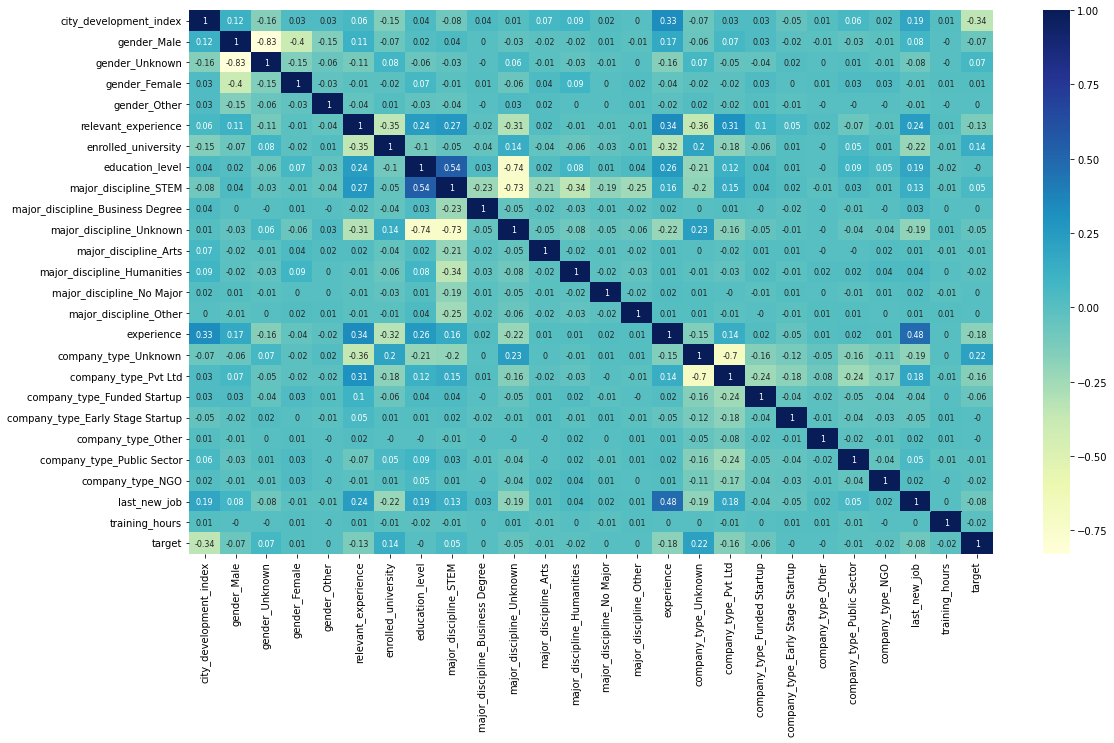

In [ ]:
plt.subplots(figsize=(18,10))
sns.heatmap(round(h_nom.corr(), 2),annot_kws={"size": 8} ,annot=True,cmap='YlGnBu')

**Export cleaned data to new dataframe**

In [ ]:
h_nom.to_csv('train_encoded.csv', index = False)
train_cleaned = pd.read_csv('train_encoded.csv')
investigator(train_cleaned)

Shape of the DataFrame:  (18644, 27) 

Num of missing values:  
 enrollee_id                         0
city_development_index              0
gender_Male                         0
gender_Unknown                      0
gender_Female                       0
gender_Other                        0
relevant_experience                 0
enrolled_university                 0
education_level                     0
major_discipline_STEM               0
major_discipline_Business Degree    0
major_discipline_Unknown            0
major_discipline_Arts               0
major_discipline_Humanities         0
major_discipline_No Major           0
major_discipline_Other              0
experience                          0
company_type_Unknown                0
company_type_Pvt Ltd                0
company_type_Funded Startup         0
company_type_Early Stage Startup    0
company_type_Other                  0
company_type_Public Sector          0
company_type_NGO                    0
last_new_job           

## **E.2 Data Normalization (Feature scaling)**

In [ ]:
train = pd.read_csv('train_encoded.csv')
train.drop('enrollee_id', axis = 1, inplace = True)

test = pd.read_csv('test_with_labels.csv')
test.drop('enrollee_id', axis =1, inplace = True)

In [ ]:
# Save the target and data in X and y

X_train = train.drop('target', axis = 1)
y_train = train['target']

print("Lenght of the train dataset:")
print(len(X_train))
print(len(y_train))

print("Length of the test set:")
X_test = test.drop('target', axis = 1)
y_test = test['target']

print(len(X_test))
print(len(y_test))

# Make sure test set's columns are in the same order with train set
train_col_names = X_train.columns
X_test = X_test[train_col_names]

Lenght of the train dataset:
18644
18644
Length of the test set:
2067
2067


In [ ]:
scaler = StandardScaler()
#fit only on train set and transform both train and test set
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Check result
cols = train.columns.tolist()
cols.remove('target')

df1 = pd.DataFrame(X_train, columns = cols)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,18644.0,2.843086e-16,1.000027,-3.093295,-0.723392,0.599534,0.737508,0.972875
gender_Male,18644.0,-8.460657e-17,1.000027,-1.498607,-1.498607,0.667287,0.667287,0.667287
gender_Unknown,18644.0,2.229497e-17,1.000027,-0.551490,-0.551490,-0.551490,-0.551490,1.813270
gender_Female,18644.0,4.706717e-17,1.000027,-0.263680,-0.263680,-0.263680,-0.263680,3.792471
gender_Other,18644.0,2.096109e-17,1.000027,-0.099837,-0.099837,-0.099837,-0.099837,10.016291
relevant_experience,18644.0,-2.458164e-17,1.000027,-1.603209,-1.603209,0.623749,0.623749,0.623749
enrolled_university,18644.0,-3.353774e-17,1.000027,-1.742069,-0.527169,-0.527169,0.687731,1.902631
education_level,18644.0,-4.725772e-17,1.000027,-3.684082,-0.075043,-0.075043,-0.075043,2.330983
major_discipline_STEM,18644.0,1.028999e-16,1.000027,-1.762814,0.567275,0.567275,0.567275,0.567275
major_discipline_Business Degree,18644.0,8.193879e-18,1.000027,-0.131939,-0.131939,-0.131939,-0.131939,7.579257


In [ ]:
def highlight_col(x):
    # copy df to new - original data is not changed
    df = x.copy()
      
    # select all values to green color
    df.loc[:, :] = 'background-color: white'
      
    # overwrite values grey color
    df[['mean', 'std']] = 'background-color: #F7D084'
    # return color df
    return df 
df1_des = df1.describe().T
df1_des.style.apply(highlight_col, axis=None)

,count,mean,std,min,25%,50%,75%,max
city_development_index,18644.000000,0.000000,1.000027,-3.093295,-0.723392,0.599534,0.737508,0.972875
gender_Male,18644.000000,-0.000000,1.000027,-1.498607,-1.498607,0.667287,0.667287,0.667287
gender_Unknown,18644.000000,0.000000,1.000027,-0.551490,-0.551490,-0.551490,-0.551490,1.813270
gender_Female,18644.000000,0.000000,1.000027,-0.263680,-0.263680,-0.263680,-0.263680,3.792471
gender_Other,18644.000000,0.000000,1.000027,-0.099837,-0.099837,-0.099837,-0.099837,10.016291
relevant_experience,18644.000000,-0.000000,1.000027,-1.603209,-1.603209,0.623749,0.623749,0.623749
enrolled_university,18644.000000,-0.000000,1.000027,-1.742069,-0.527169,-0.527169,0.687731,1.902631
education_level,18644.000000,-0.000000,1.000027,-3.684082,-0.075043,-0.075043,-0.075043,2.330983
major_discipline_STEM,18644.000000,0.000000,1.000027,-1.762814,0.567275,0.567275,0.567275,0.567275
major_discipline_Business Degree,18644.000000,0.000000,1.000027,-0.131939,-0.131939,-0.131939,-0.131939,7.579257


In [ ]:
df2 = pd.DataFrame(X_test, columns= cols)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,2067.0,-0.033676,1.015781,-3.093295,-1.064268,0.599534,0.737508,0.972875
gender_Male,2067.0,-0.009621,1.004188,-1.498607,-1.498607,0.667287,0.667287,0.667287
gender_Unknown,2067.0,0.012529,1.008039,-0.551490,-0.551490,-0.551490,-0.551490,1.813270
gender_Female,2067.0,-0.008576,0.984952,-0.263680,-0.263680,-0.263680,-0.263680,3.792471
gender_Other,2067.0,0.012727,1.061410,-0.099837,-0.099837,-0.099837,-0.099837,10.016291
relevant_experience,2067.0,-0.014064,1.007009,-1.603209,-1.603209,0.623749,0.623749,0.623749
enrolled_university,2067.0,0.039432,1.009481,-1.742069,-0.527169,-0.527169,0.687731,1.902631
education_level,2067.0,0.010512,1.011493,-3.684082,-0.075043,-0.075043,1.127970,2.330983
major_discipline_STEM,2067.0,0.013780,0.991873,-1.762814,0.567275,0.567275,0.567275,0.567275
major_discipline_Business Degree,2067.0,0.002363,1.009003,-0.131939,-0.131939,-0.131939,-0.131939,7.579257


In [ ]:
df1['target'] = y_train
df2['target'] = y_test

df1.to_csv('train_after_scale.csv', index = False)
df2.to_csv('test_after_scale.csv', index =  False)

In [ ]:
this_train = pd.read_csv('train_after_scale.csv')
this_test = pd.read_csv('test_after_scale.csv')

In [ ]:
investigator(this_train)
investigator(this_test)

Shape of the DataFrame:  (18644, 26) 

Num of missing values:  
 city_development_index              0
gender_Male                         0
gender_Unknown                      0
gender_Female                       0
gender_Other                        0
relevant_experience                 0
enrolled_university                 0
education_level                     0
major_discipline_STEM               0
major_discipline_Business Degree    0
major_discipline_Unknown            0
major_discipline_Arts               0
major_discipline_Humanities         0
major_discipline_No Major           0
major_discipline_Other              0
experience                          0
company_type_Unknown                0
company_type_Pvt Ltd                0
company_type_Funded Startup         0
company_type_Early Stage Startup    0
company_type_Other                  0
company_type_Public Sector          0
company_type_NGO                    0
last_new_job                        0
training_hours         